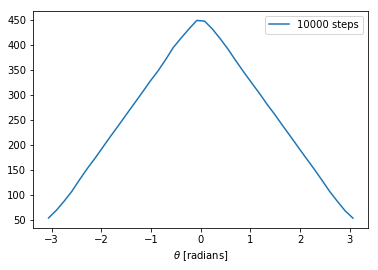

In [42]:
import numpy as np
import galsim
import matplotlib.pyplot as plt

total_trials = 1000
n_iters = [10000]
n_bins = 40
min_ang = -np.pi/2
max_ang = np.pi/2

ud = galsim.UniformDeviate()

histograms = np.zeros((total_trials, n_bins, len(n_iters)))
for i_trial in range(total_trials):    
    angs = []
    current_ang = 0.0
    for i in range(max(n_iters)):
        if i==0:
            angs.append(current_ang)
        else:
            # add a number from -90 to 90 degrees to the previous number
            new_ang = angs[i-1] + np.pi*ud()/2-np.pi/4.
            # wrap at +/- 90 degrees
            if new_ang < -np.pi: new_ang += np.pi
            if new_ang > np.pi: new_ang -= np.pi
            angs.append(new_ang)
    for i_iter in range(len(n_iters)):
        h, b = np.histogram(angs[0:n_iters[i_iter]], bins=n_bins)
        histograms[i_trial, :, i_iter] = h

x = 0.5*(b[1:] + b[:-1])
avg_hist = histograms.sum(axis=0)/total_trials
fig = plt.figure()
ax = fig.add_subplot(111)
for i_iter in range(len(n_iters)):
    ax.plot(x, avg_hist[:, i_iter], label='%d steps'%n_iters[i_iter])
plt.legend()
plt.xlabel(r'$\theta$ [radians]')
plt.show()


In [27]:
import lsst.sims.maf.stackers as S

In [33]:
??S.RandomRotDitherPerFilterChangeStacker

In [32]:
??np.random.rand

(array([ 103.,   99.,  101.,   95.,  111.,   93.,   97.,  108.,  105.,   88.]),
 array([-89.51302517, -71.58157192, -53.65011867, -35.71866543,
        -17.78721218,   0.14424106,  18.07569431,  36.00714756,
         53.9386008 ,  71.87005405,  89.80150729]),
 <a list of 10 Patch objects>)

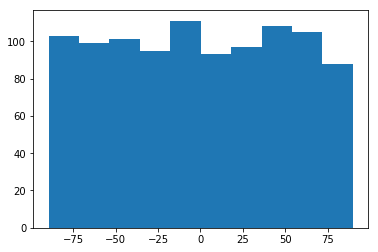

In [41]:
plt.hist(np.random.rand(1000) * 2.0 * 90 - 90)